In [133]:
import pyfolio as pf

In [139]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [141]:
%%zipline -b yahoo_csv_bundle_allweather_us --start 2007-1-3 --end 2020-4-23 --capital-base 10000 


# Put any initialization logic here.  The context object will be passed to
# the other methods in your algorithm.
from zipline.api import order, record, symbol, order_percent, order_target_percent, get_datetime
from zipline.finance import commission, slippage
import logbook
log = logbook.Logger(__name__)
def initialize(context):
    context.stock = symbol('SPY')
    context.long_bond = symbol('TLT')
    context.mid_bond = symbol('IEF')
    context.gold = symbol('GLD')
    context.commodity = symbol('DBC')
    
    context.stock_position = 0.30
    context.long_bond_position = 0.40
    context.mid_bond_position = 0.15
    context.gold_position = 0.075
    context.commodity_position = 0.075
    
    context.rebalance_inteval = 365
    context.rebalance_date = 0

    context.fired = False
    

def rebalance(context, data):
    values = context.portfolio.portfolio_value
    
    order_percent(context.stock,0)
    order_percent(context.long_bond,0)
    order_percent(context.mid_bond,0)
    order_percent(context.gold,0)
    order_percent(context.commodity,0)
    
    order_target_percent(context.stock,context.stock_position)
    order_target_percent(context.long_bond, context.long_bond_position)
    order_target_percent(context.mid_bond, context.mid_bond_position)
    order_target_percent(context.gold,context.gold_position)
    order_target_percent(context.commodity, context.commodity_position)
                  
    

# Will be called on every trade event for the securities you specify. 
def handle_data(context, data):
    # Implement your algorithm logic here.

    # data[sid(X)] holds the trade event data for that security.
    # context.portfolio holds the current portfolio state.

    # Place orders with the order(SID, amount) method.

    # TODO: implement your own logic here.
    
    
    if not context.fired:
        order_target_percent(context.stock,context.stock_position)
        order_target_percent(context.long_bond, context.long_bond_position)
        order_target_percent(context.mid_bond, context.mid_bond_position)
        order_target_percent(context.gold, context.gold_position)
        order_target_percent(context.commodity, context.commodity_position)
        context.rebalance_date = get_datetime()
        log.info("build portfolio at " + str(context.rebalance_date))
        context.fired = True
    else:
        now = get_datetime()
        if (now.year > context.rebalance_date.year):
            log.info("new year arrivied:" + str(now))
            
            context.rebalance_date = now
            rebalance(context, data)

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2007-01-03 21:00:00+00:00,NaN,0.000000,NaN,0.002122,NaN,NaN,0.000000,10000.000000,0.000,0.000,...,0.0,0.0,0,NaN,10000.000000,0.000,0.000,1,[],0.0
2007-01-04 21:00:00+00:00,0.005681,-0.000506,NaN,0.004249,0.000000,NaN,-9874.485713,125.514287,9869.425,9869.425,...,0.0,0.0,0,-11.224972,10000.000000,0.000,0.000,2,"[{'amount': 12, 'dt': 2007-01-04 21:00:00+00:0...",0.0
2007-01-05 21:00:00+00:00,0.058358,-0.007108,-0.400158,-0.003761,0.092554,0.629039,0.000000,125.514287,9803.405,9803.405,...,0.0,0.0,0,-9.838510,125.514287,9869.425,9869.425,3,[],0.0
2007-01-08 21:00:00+00:00,0.063651,-0.004182,-0.302065,0.000846,0.088775,0.705286,0.000000,125.514287,9832.661,9832.661,...,0.0,0.0,0,-4.990056,125.514287,9803.405,9803.405,4,[],0.0
2007-01-09 21:00:00+00:00,0.055277,-0.004643,-0.234712,-0.000004,0.077258,0.693181,0.000000,125.514287,9828.058,9828.058,...,0.0,0.0,0,-4.946563,125.514287,9832.661,9832.661,5,[],0.0
2007-01-10 21:00:00+00:00,0.050360,-0.007035,-0.379239,0.003327,0.072379,0.592451,0.000000,125.514287,9804.139,9804.139,...,0.0,0.0,0,-6.451317,125.514287,9828.058,9828.058,6,[],0.0
2007-01-11 21:00:00+00:00,0.046001,-0.008466,-0.450510,0.007722,0.069931,0.521300,0.000000,125.514287,9789.828,9789.828,...,0.0,0.0,0,-7.051873,125.514287,9804.139,9804.139,7,[],0.0
2007-01-12 21:00:00+00:00,0.050682,-0.004812,-0.429959,0.015378,0.074285,0.577330,0.000000,125.514287,9826.368,9826.368,...,0.0,0.0,0,-3.726871,125.514287,9789.828,9789.828,8,[],0.0
2007-01-16 21:00:00+00:00,0.047577,-0.006159,-0.377024,0.013393,0.072447,0.546732,0.000000,125.514287,9812.892,9812.892,...,0.0,0.0,0,-4.430329,125.514287,9826.368,9826.368,9,[],0.0
2007-01-17 21:00:00+00:00,0.045015,-0.006089,-0.340652,0.013818,0.068515,0.539058,0.000000,125.514287,9813.594,9813.594,...,0.0,0.0,0,-4.154630,125.514287,9812.892,9812.892,10,[],0.0


In [142]:
results=_

In [143]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

Start date,2007-01-03
End date,2020-04-23
Total months,159
,Backtest
Annual return,5.1%
Cumulative returns,94.2%
Annual volatility,7.5%
Sharpe ratio,0.70
Calmar ratio,0.31
Stability,0.93
Max drawdown,-16.5%


/Users/cedriss/miniconda3/envs/env_zipline/envs/env_zipline_remote/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.55,2008-05-20,2009-03-03,2010-07-22,568
1,13.82,2020-03-06,2020-03-18,NaT,NaN
2,9.70,2015-02-02,2016-01-11,2016-06-09,354
3,8.44,2016-07-08,2016-12-16,2017-11-06,347
4,8.39,2018-01-26,2018-12-24,2019-04-10,314


Stress Events,mean,min,max
Lehman,-0.06%,-0.90%,0.68%
US downgrade/European Debt Crisis,0.21%,-1.42%,1.59%
Fukushima,0.08%,-0.49%,0.86%
EZB IR Event,-0.02%,-0.92%,0.58%
Aug07,0.05%,-1.00%,0.75%
Mar08,-0.03%,-0.76%,0.87%
Sept08,-0.12%,-0.90%,0.68%
2009Q1,-0.35%,-1.95%,1.07%
2009Q2,0.08%,-1.46%,3.10%
Flash Crash,-0.05%,-1.05%,0.49%


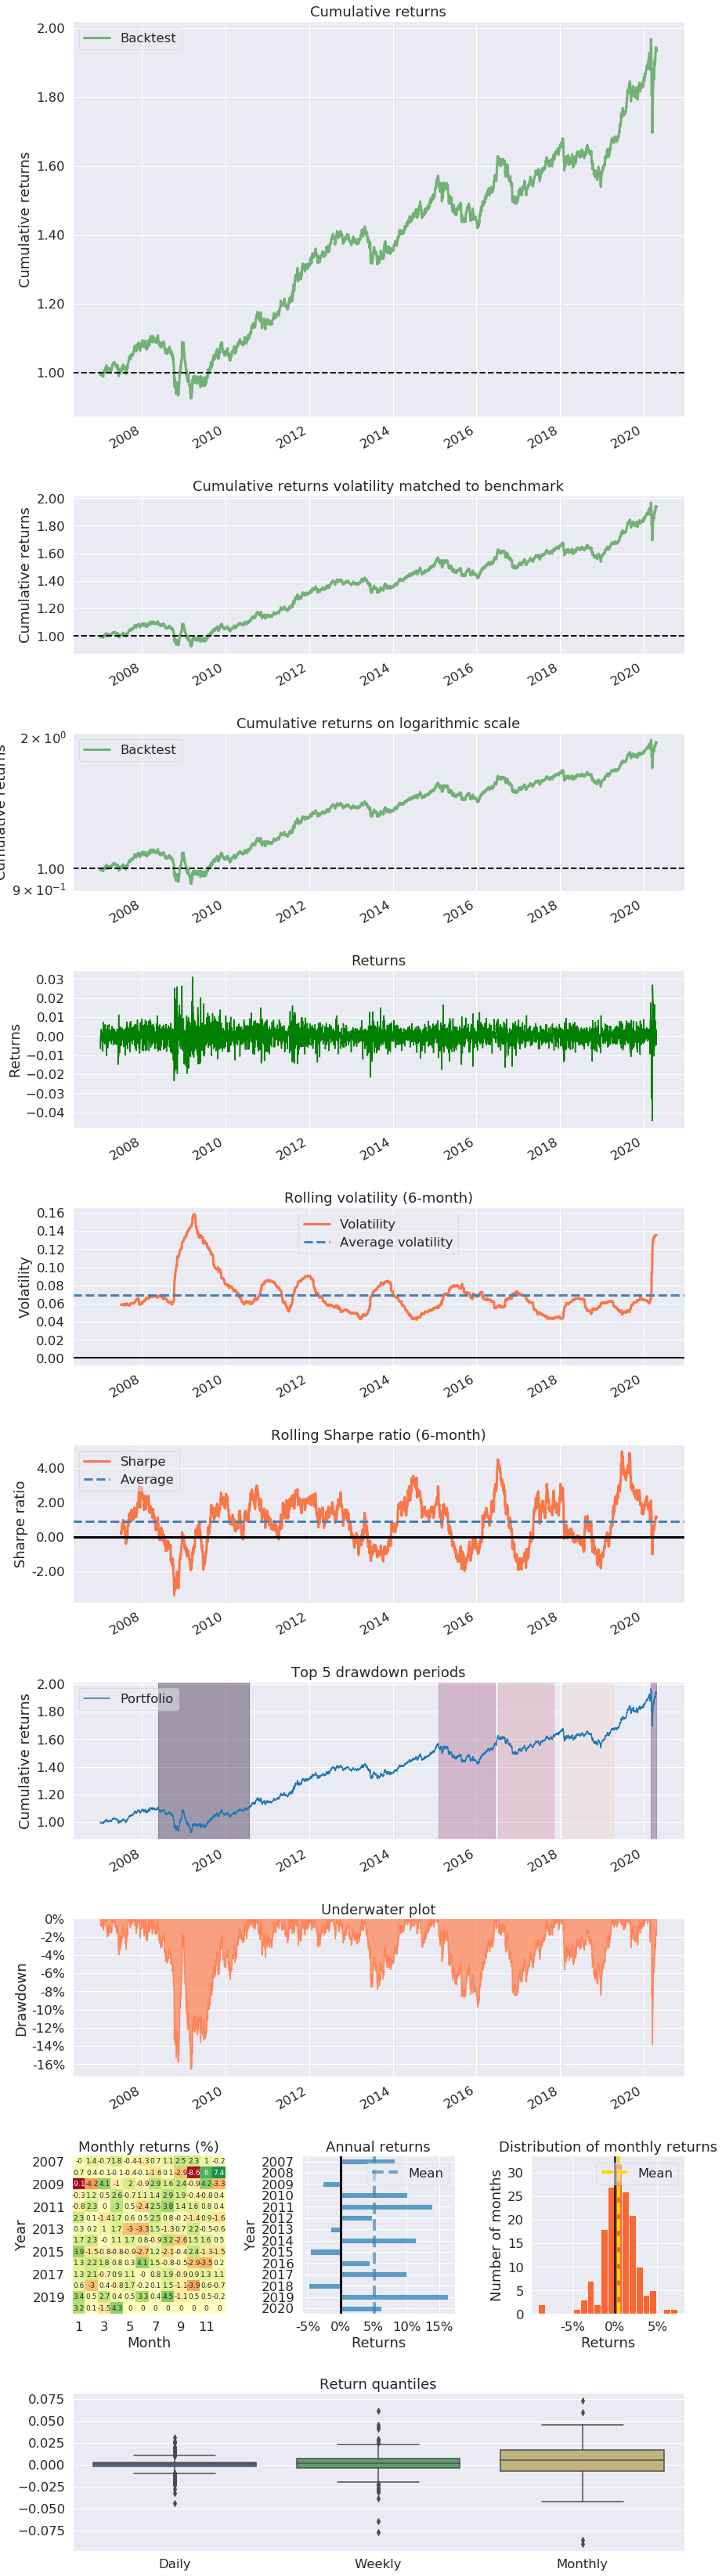

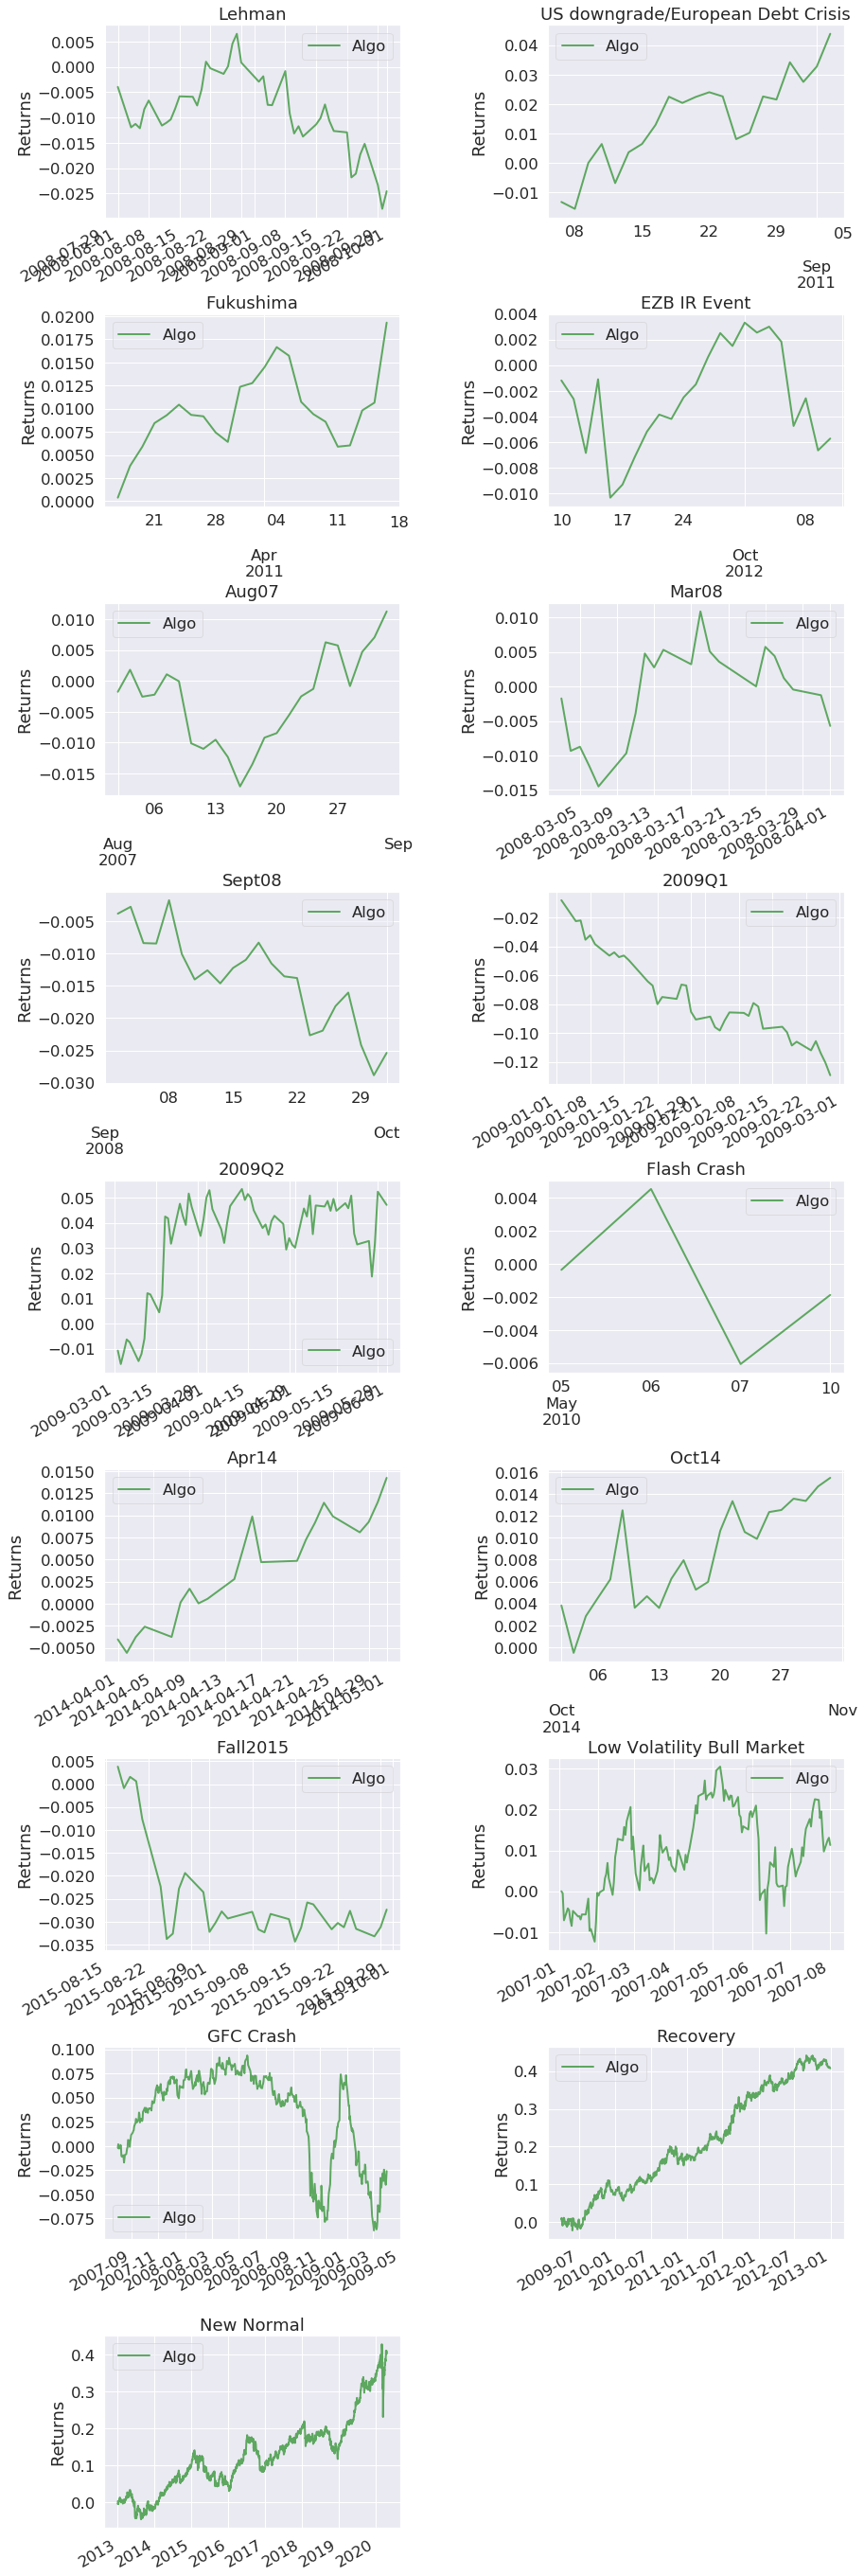

In [144]:
pf.create_full_tear_sheet(returns)

In [57]:
returns.tail()

2020-04-17 00:00:00+00:00   -0.001446
2020-04-20 00:00:00+00:00   -0.000560
2020-04-21 00:00:00+00:00   -0.004052
2020-04-22 00:00:00+00:00    0.002190
2020-04-23 00:00:00+00:00    0.003247
Name: returns, dtype: float64

In [63]:
results[alpha]

NameError: name 'alpha' is not defined

In [70]:
returns

2007-01-03 00:00:00+00:00    0.000000
2007-01-04 00:00:00+00:00   -0.000052
2007-01-05 00:00:00+00:00   -0.000925
2007-01-08 00:00:00+00:00    0.000964
2007-01-09 00:00:00+00:00   -0.000182
2007-01-10 00:00:00+00:00    0.000907
2007-01-11 00:00:00+00:00    0.001301
2007-01-12 00:00:00+00:00    0.002786
2007-01-16 00:00:00+00:00   -0.000671
2007-01-17 00:00:00+00:00    0.000392
2007-01-18 00:00:00+00:00   -0.001181
2007-01-19 00:00:00+00:00    0.000962
2007-01-22 00:00:00+00:00   -0.001059
2007-01-23 00:00:00+00:00    0.001736
2007-01-24 00:00:00+00:00    0.002478
2007-01-25 00:00:00+00:00   -0.003844
2007-01-26 00:00:00+00:00   -0.000185
2007-01-29 00:00:00+00:00   -0.000545
2007-01-30 00:00:00+00:00    0.001993
2007-01-31 00:00:00+00:00    0.002700
2007-02-01 00:00:00+00:00    0.002057
2007-02-02 00:00:00+00:00   -0.000455
2007-02-05 00:00:00+00:00    0.000140
2007-02-06 00:00:00+00:00    0.000707
2007-02-07 00:00:00+00:00    0.000535
2007-02-08 00:00:00+00:00    0.000683
2007-02-09 0

In [145]:
results['transactions'][1]

[{'amount': 12,
  'commission': None,
  'dt': Timestamp('2007-01-04 21:00:00+0000', tz='UTC'),
  'order_id': '3de79c1bb66149a7a034540c3049a23a',
  'price': 61.680825,
  'sid': Equity(0 [GLD])},
 {'amount': 18,
  'commission': None,
  'dt': Timestamp('2007-01-04 21:00:00+0000', tz='UTC'),
  'order_id': 'a0ee8cf40fa3443bb7cf8d92ea27cf6f',
  'price': 83.02149,
  'sid': Equity(1 [IEF])},
 {'amount': 31,
  'commission': None,
  'dt': Timestamp('2007-01-04 21:00:00+0000', tz='UTC'),
  'order_id': '29613cb4484443cebd0d494c78360f00',
  'price': 23.19159,
  'sid': Equity(2 [DBC])},
 {'amount': 44,
  'commission': None,
  'dt': Timestamp('2007-01-04 21:00:00+0000', tz='UTC'),
  'order_id': '1cabd1b3236446d9826e4767dbc484be',
  'price': 89.6437995,
  'sid': Equity(3 [TLT])},
 {'amount': 21,
  'commission': None,
  'dt': Timestamp('2007-01-04 21:00:00+0000', tz='UTC'),
  'order_id': '3e251b05b668449dbf5400ae9b57eca3',
  'price': 141.7398345,
  'sid': Equity(4 [SPY])}]